In [1]:
from os.path import join, dirname, exists
from os import makedirs
from itertools import chain, islice

from thesis_v2 import dir_dict

In [2]:
from scipy.stats import sem
import numpy as np

In [3]:
import pandas as pd

In [4]:
f_main_result = join(dir_dict['analyses'], 'tang_refactored', '20200819', 'hal_tuning.pkl')
df_main_result = pd.read_pickle(f_main_result)

In [5]:
df_main_result

hal_tuning_analysis  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                       
relu     False                mse       0          2         8           1           cm-avg       350                       None   
                                                                                                  700                       None   
                                                                                                  1400                      None   
                                                                                     cm-last      350                       None   
                                                                                                  700                       None   
...                                                                                                                          ...   
softplus True                 poisson   1          6         16          1           legacy       700                       None   
                                                                                                  1400                      None   
                                                             32          1           legacy       350                       None   
                                                                                                  700                       None   
                                                                                                  1400                      None   

                                                                                                             hal_tuning_analysis_inverted  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                                
relu     False                mse       0          2         8           1           cm-avg       350                                None   
                                                                                                  700                                None   
                                                                                                  1400                               None   
                                                                                     cm-last      350                                None   
                                                                                                  700                                None   
...                                                                                                                                   ...   
softplus True                 poisson   1          6         16          1           legacy       700                                None   
                                                                                                  1400                               None   
                                                             32          1           legacy       350                                None   
                                                                                                  700                                None   
                                                                                                  1400                               None   

                                                                                                              num_param  
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep             
relu     False                mse       0          2         8           1           cm-avg       350             13846  
                                                                                                  700             13846  
                                                                      

In [6]:
def get_mean(x):
    if x is None:
        return np.nan
    return x['diffs'].mean()
def get_sem(x):
    if x is None:
        return np.nan
    return sem(x['diffs'], ddof=0)


df_main_result['hal_tuning_mean'] = df_main_result['hal_tuning_analysis'].map(lambda x: get_mean(x))
df_main_result['hal_tuning_sem'] = df_main_result['hal_tuning_analysis'].map(lambda x: get_sem(x))

df_main_result['hal_tuning_mean_inv'] = df_main_result['hal_tuning_analysis_inverted'].map(lambda x: get_mean(x))
df_main_result['hal_tuning_sem_inv'] = df_main_result['hal_tuning_analysis_inverted'].map(lambda x: get_sem(x))

In [7]:
# show mean vs sem, for different cls

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

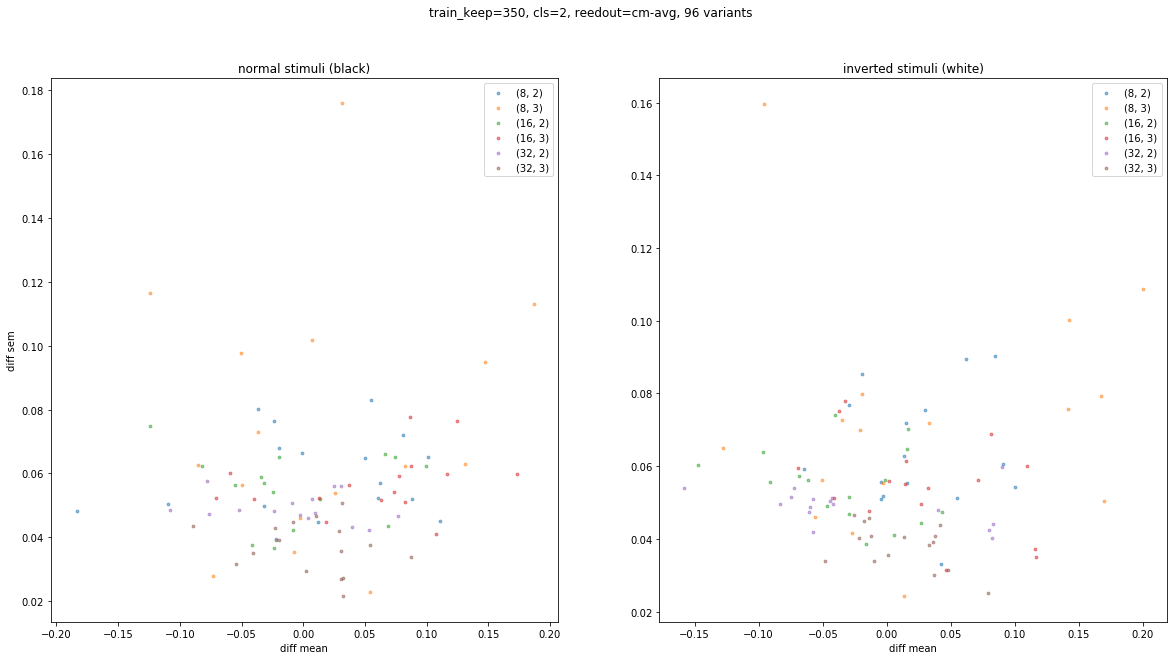

mean of mean over this readout 0.012232073585773934 mean of sem over this readout 0.05549356021767726
mean of mean over this readout, inverted 0.0054920163110588815 mean of sem over this readout 0.055488398463899836


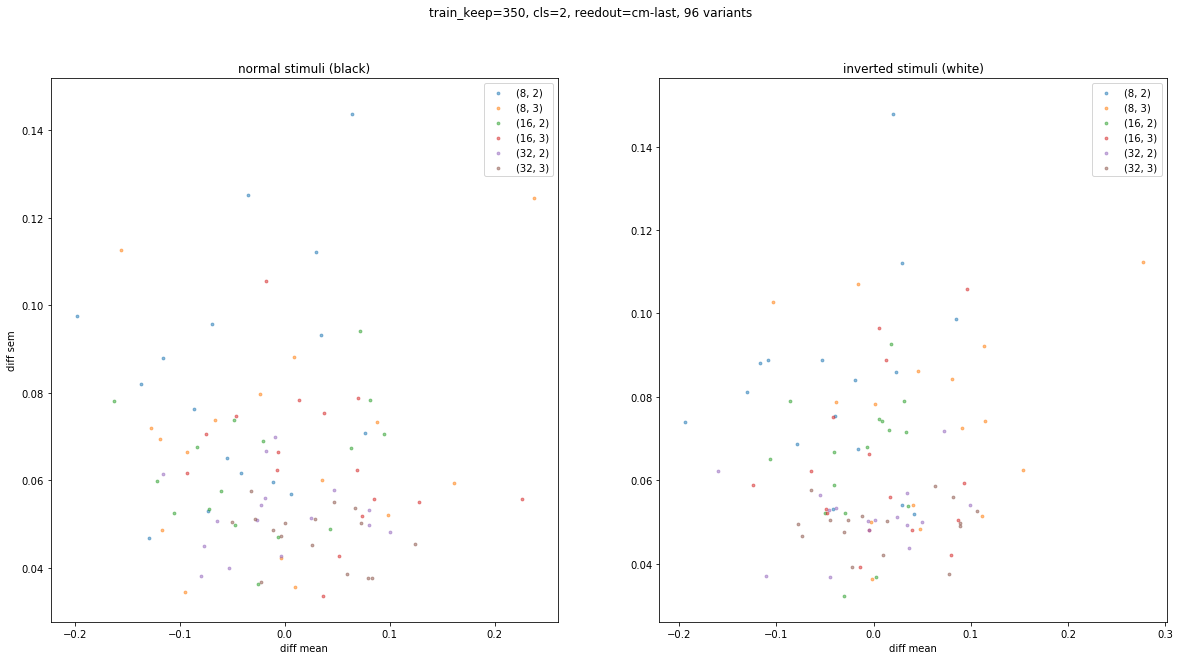

mean of mean over this readout -0.004942616622661319 mean of sem over this readout 0.06301769258849234
mean of mean over this readout, inverted 0.0025858803144619817 mean of sem over this readout 0.06409412751197328


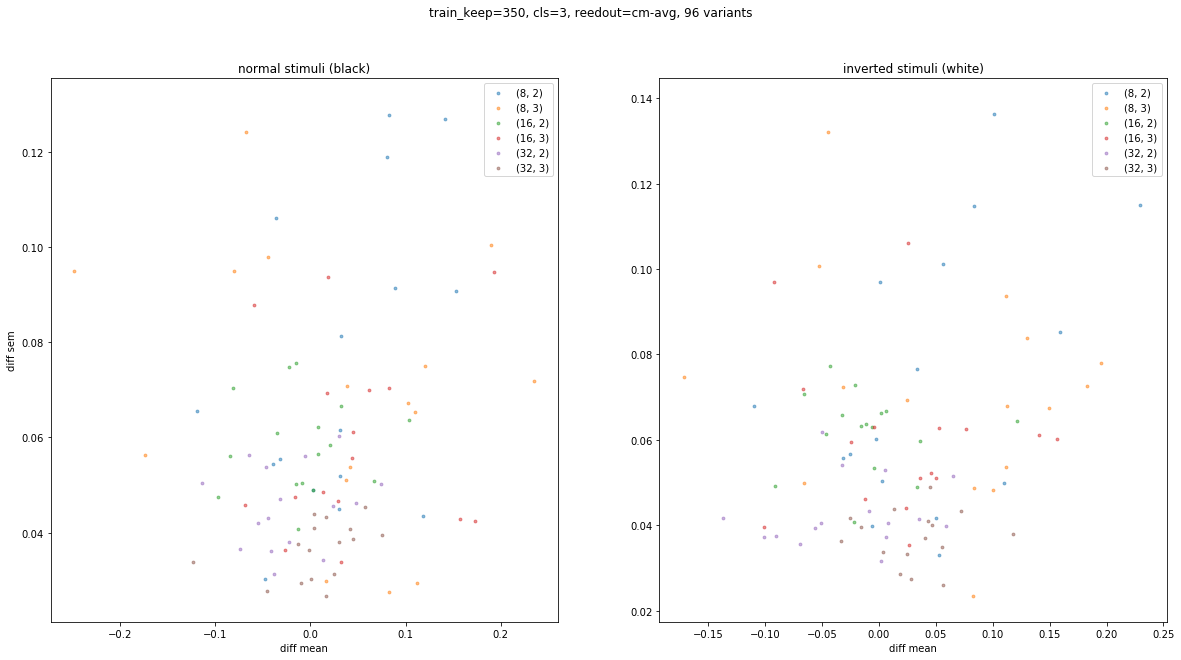

mean of mean over this readout 0.013938242945942434 mean of sem over this readout 0.05732193955437975
mean of mean over this readout, inverted 0.019374569795578202 mean of sem over this readout 0.057841698059175106


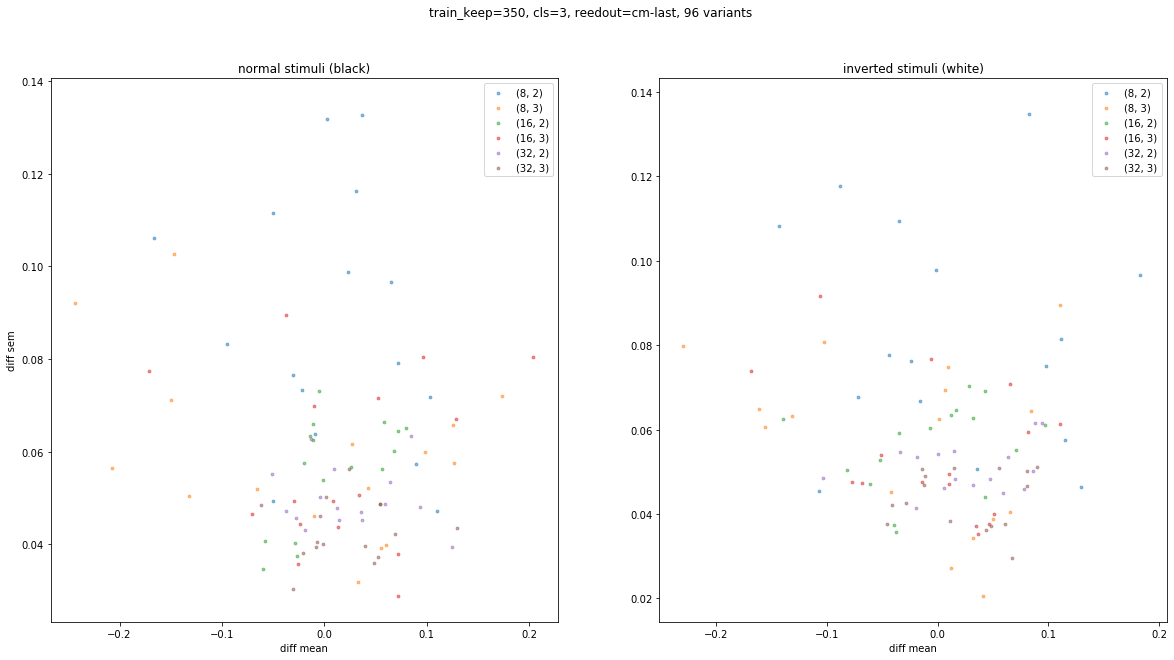

mean of mean over this readout 0.011111902389674322 mean of sem over this readout 0.058837792976188234
mean of mean over this readout, inverted 0.004955704482765607 mean of sem over this readout 0.05740965000419712


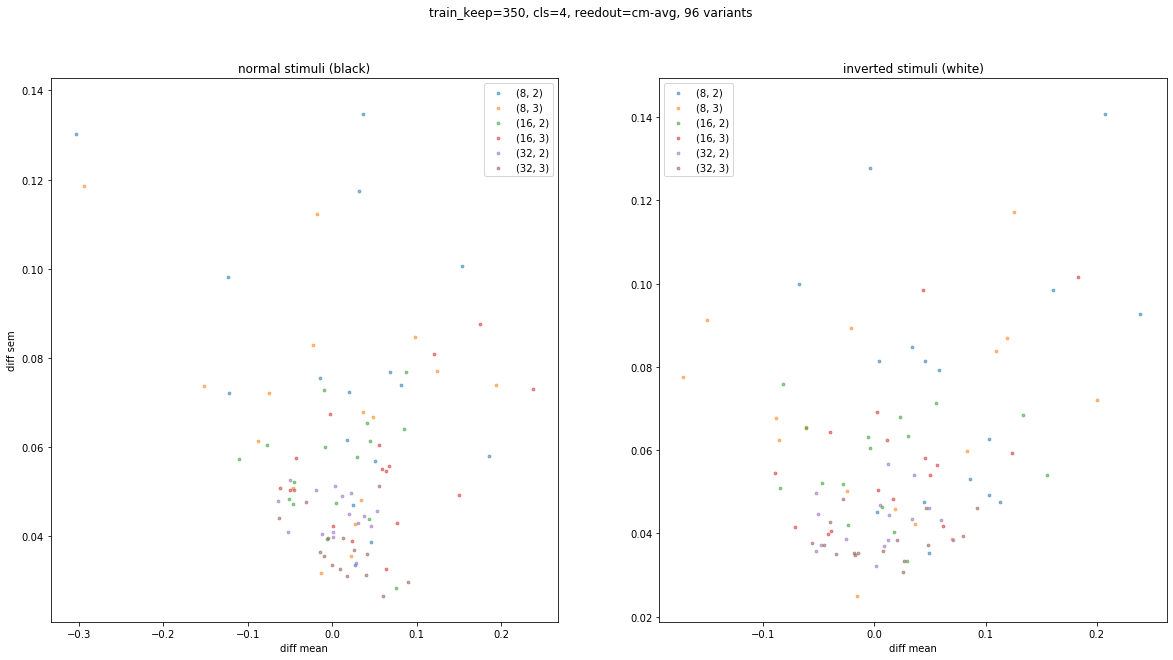

mean of mean over this readout 0.0134177960172919 mean of sem over this readout 0.05669945354575783
mean of mean over this readout, inverted 0.019930848707994133 mean of sem over this readout 0.05678015007359479


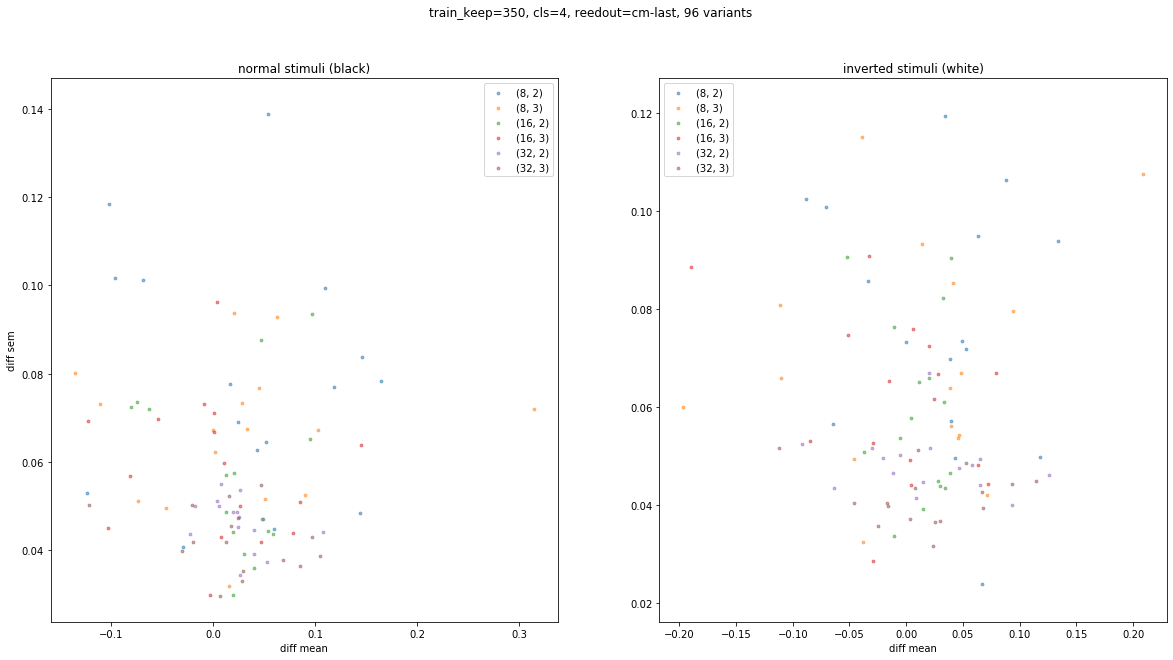

mean of mean over this readout 0.021210178291999438 mean of sem over this readout 0.05812753664550882
mean of mean over this readout, inverted 0.01238159618648046 mean of sem over this readout 0.059428312981254096


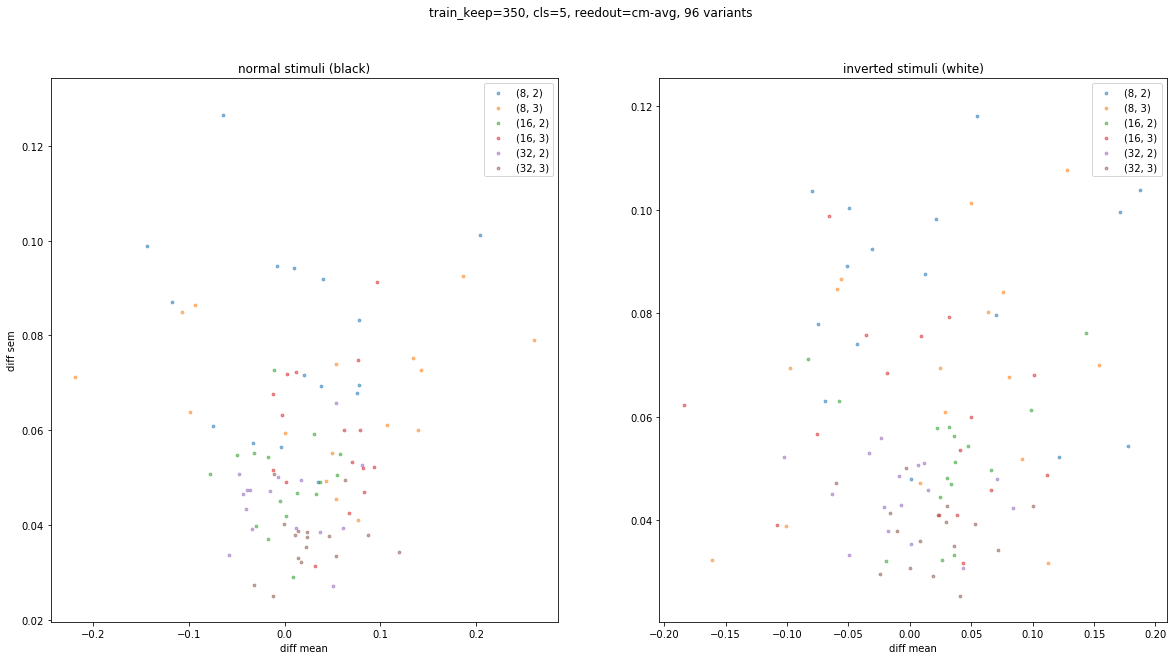

mean of mean over this readout 0.020937629417814213 mean of sem over this readout 0.056074859597556
mean of mean over this readout, inverted 0.015217895054979792 mean of sem over this readout 0.05757198118538207


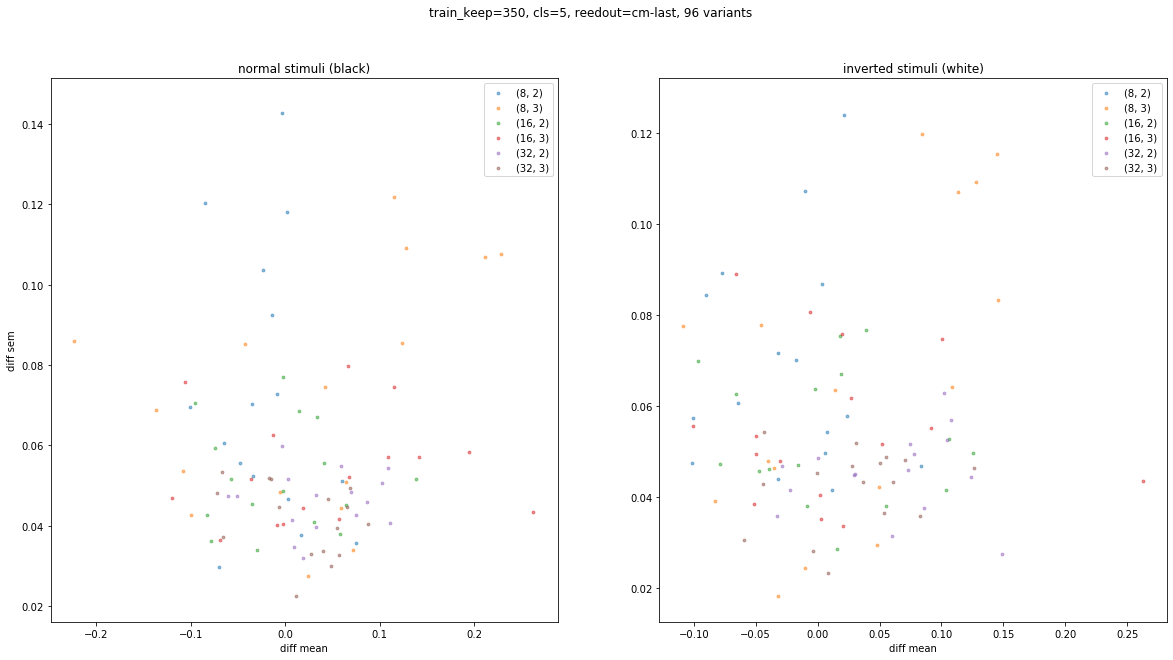

mean of mean over this readout 0.01650226606767167 mean of sem over this readout 0.056251795165916774
mean of mean over this readout, inverted 0.01934912436414944 mean of sem over this readout 0.05506320976597182


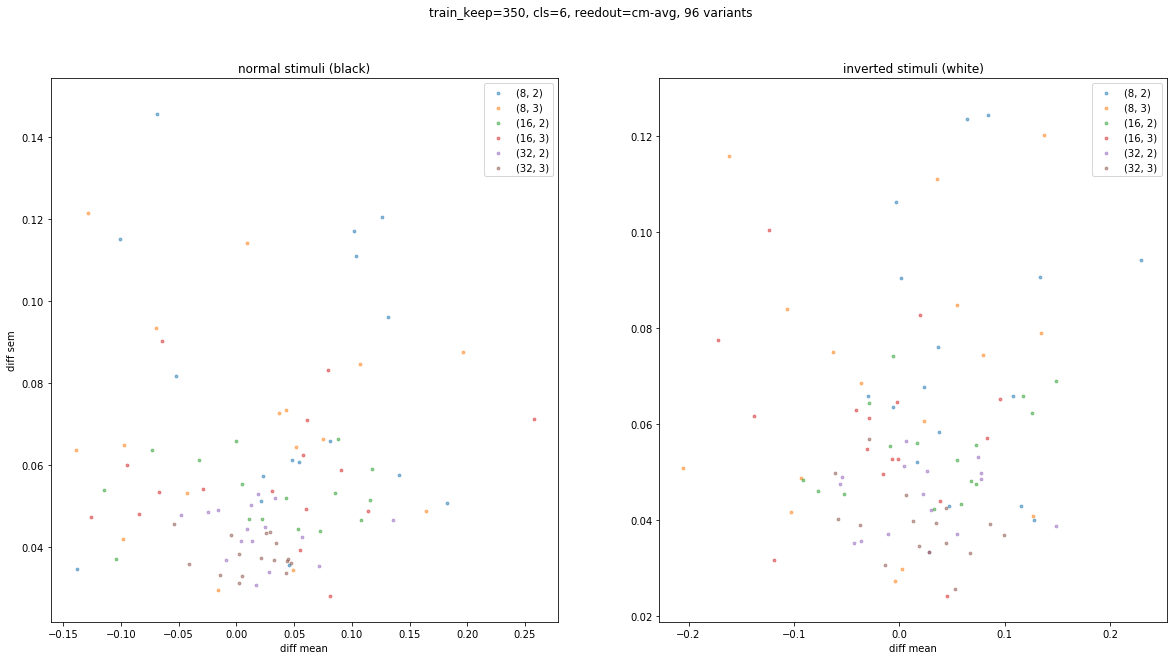

mean of mean over this readout 0.022954919199480044 mean of sem over this readout 0.05672495779030215
mean of mean over this readout, inverted 0.016127307731049336 mean of sem over this readout 0.05702261291324928


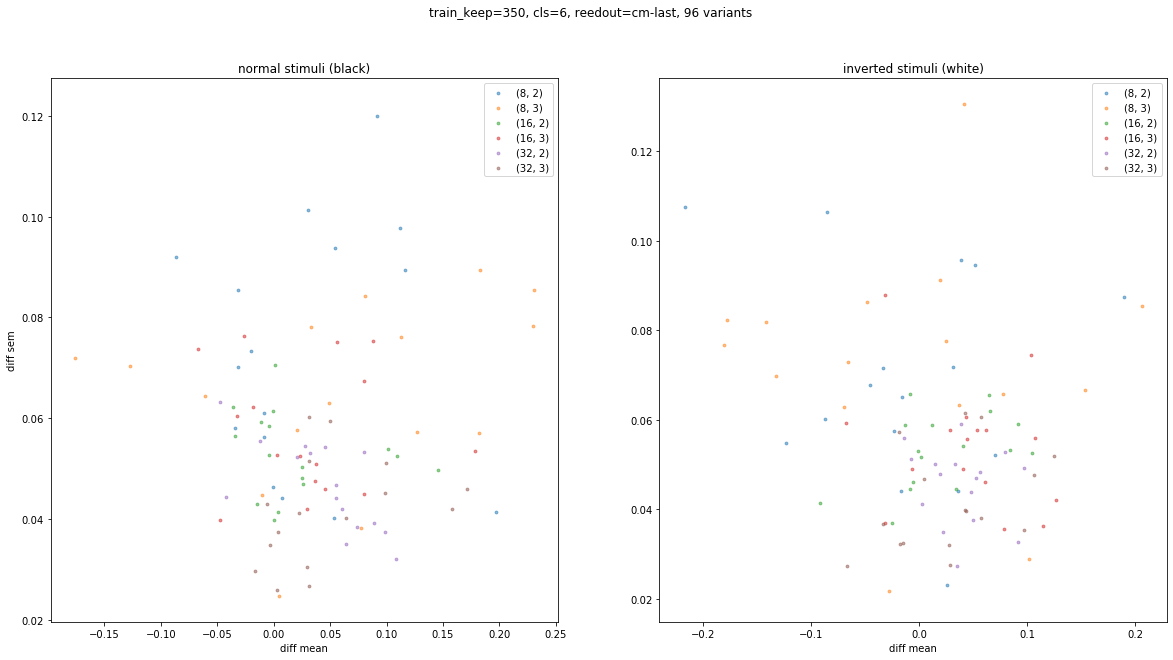

mean of mean over this readout 0.03826632637744848 mean of sem over this readout 0.05620774797226086
mean of mean over this readout, inverted 0.018405922931208445 mean of sem over this readout 0.055987404293064834


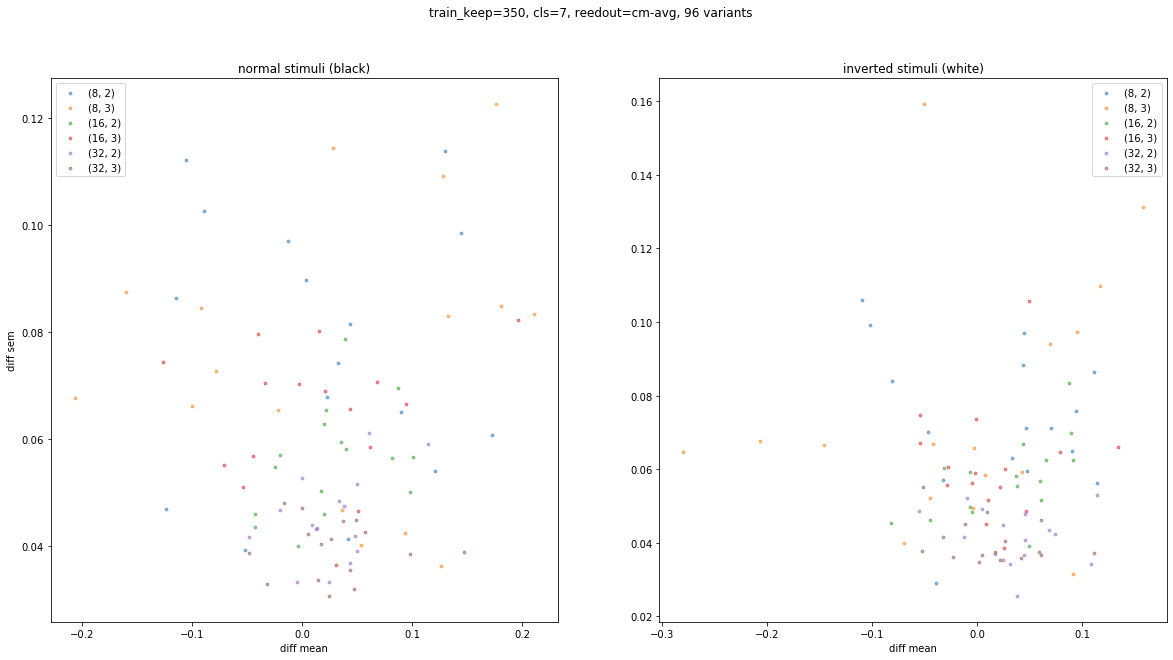

mean of mean over this readout 0.024236481989019277 mean of sem over this readout 0.05957047409365011
mean of mean over this readout, inverted 0.015433450697958116 mean of sem over this readout 0.05828463518348994


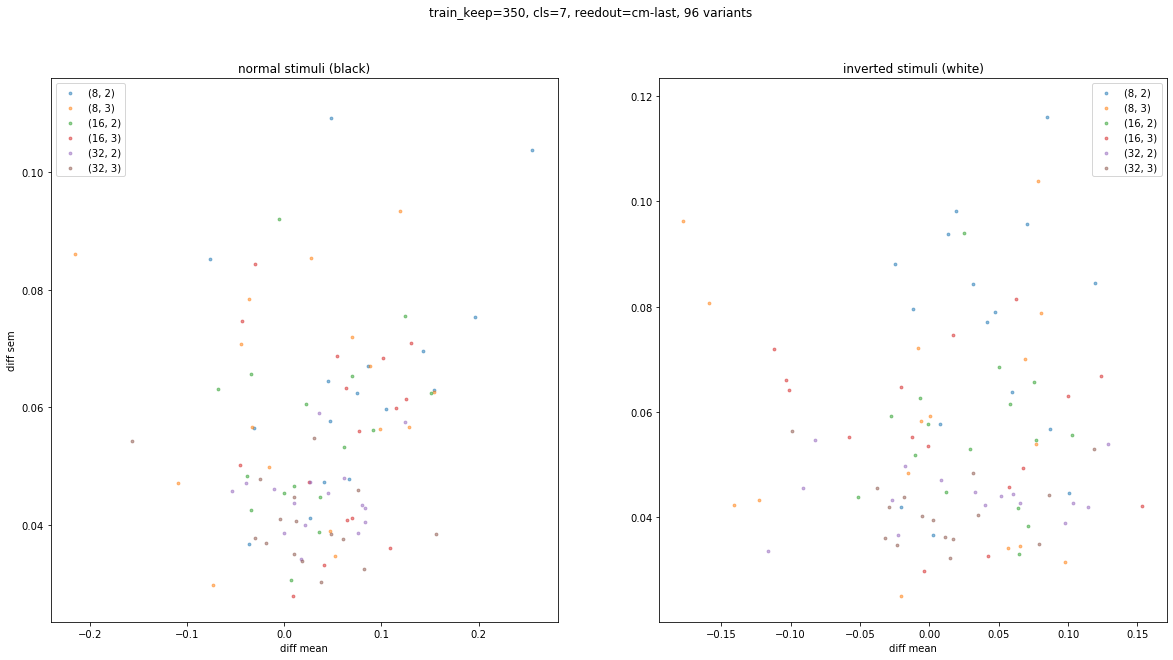

mean of mean over this readout 0.03712233181909661 mean of sem over this readout 0.053927416310796526
mean of mean over this readout, inverted 0.01818481408719152 mean of sem over this readout 0.055196376522705516


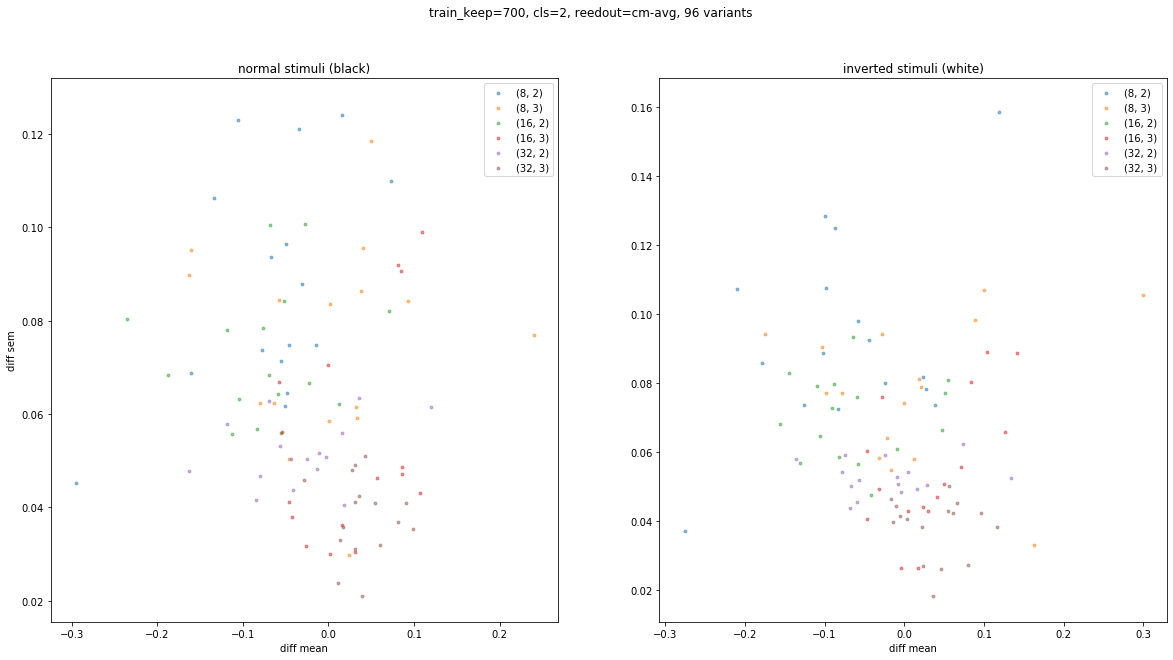

mean of mean over this readout -0.018158024242826674 mean of sem over this readout 0.06318052870092546
mean of mean over this readout, inverted -0.012410286229780873 mean of sem over this readout 0.06449097145580462


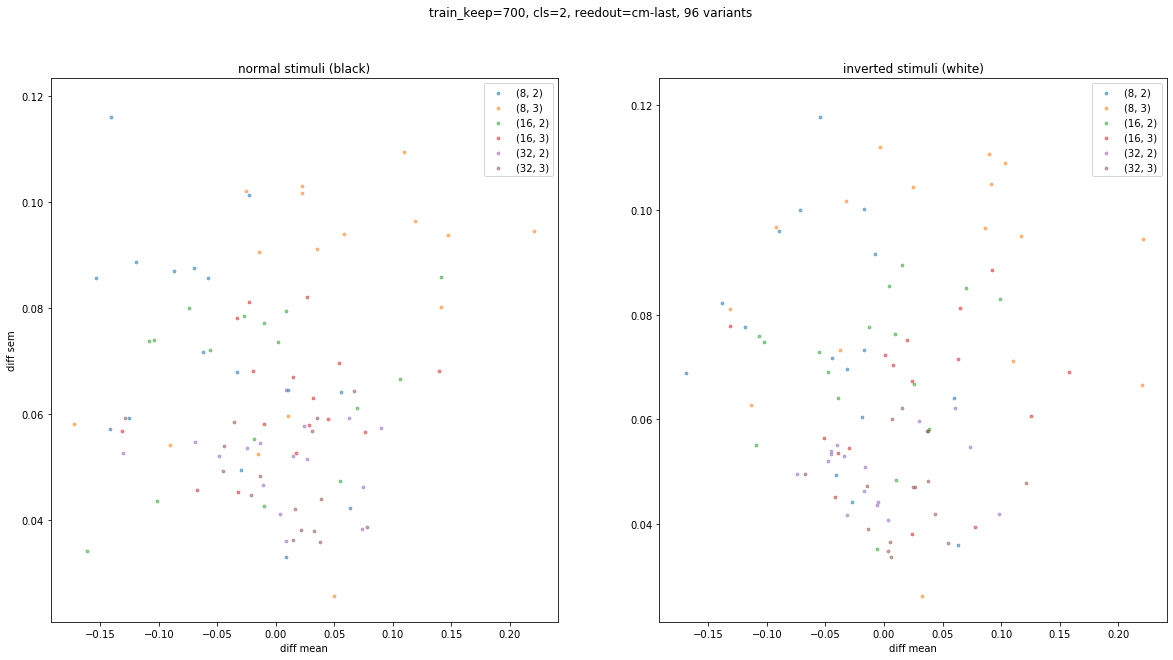

mean of mean over this readout -0.002987904016399805 mean of sem over this readout 0.06367224053647892
mean of mean over this readout, inverted 0.0035235110198840306 mean of sem over this readout 0.0656130189444159


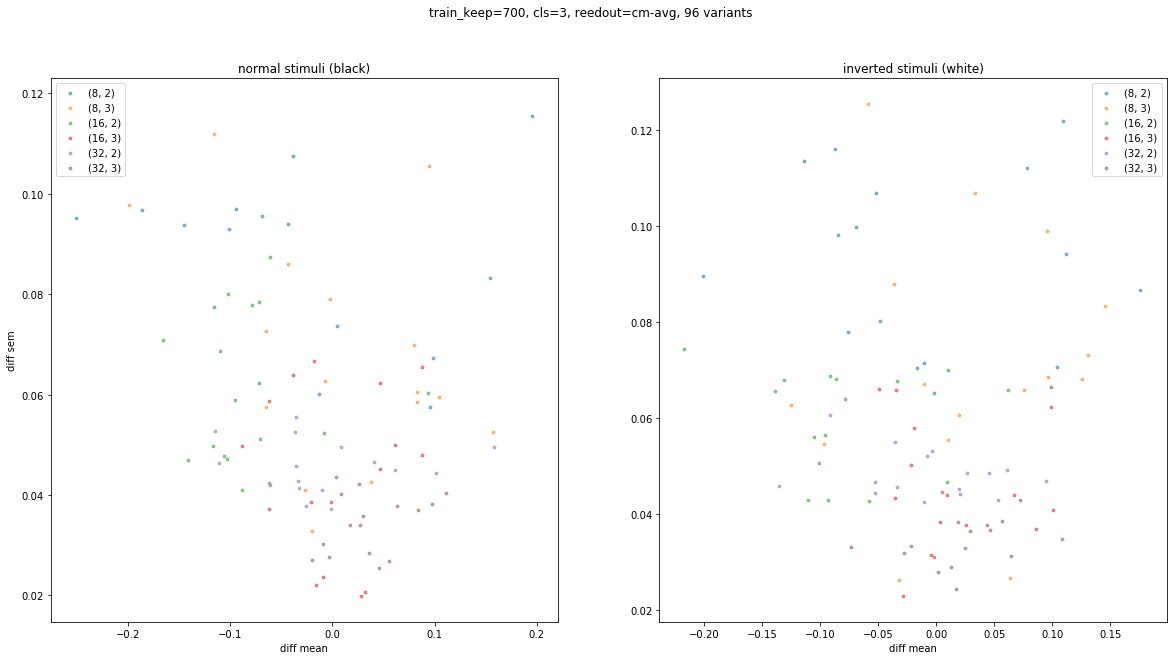

mean of mean over this readout -0.01315744609192076 mean of sem over this readout 0.05637107438314929
mean of mean over this readout, inverted -0.0045181645715692284 mean of sem over this readout 0.05850663849395061


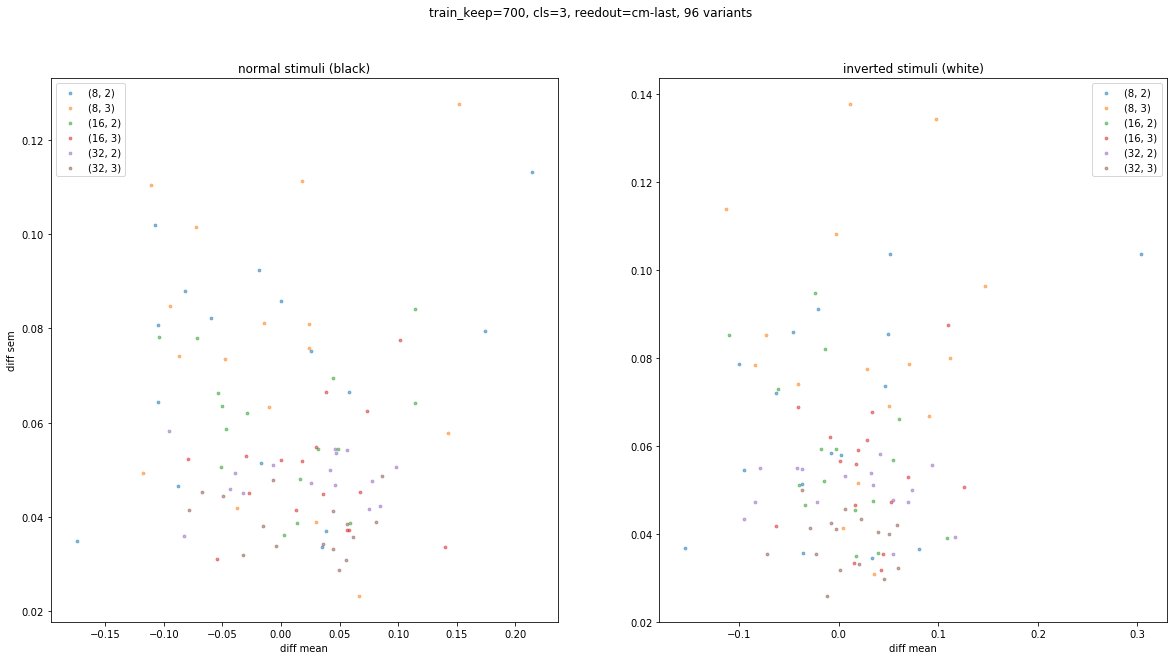

mean of mean over this readout 0.007109454851850244 mean of sem over this readout 0.05671674962453007
mean of mean over this readout, inverted 0.012215225132709647 mean of sem over this readout 0.05800893385911779


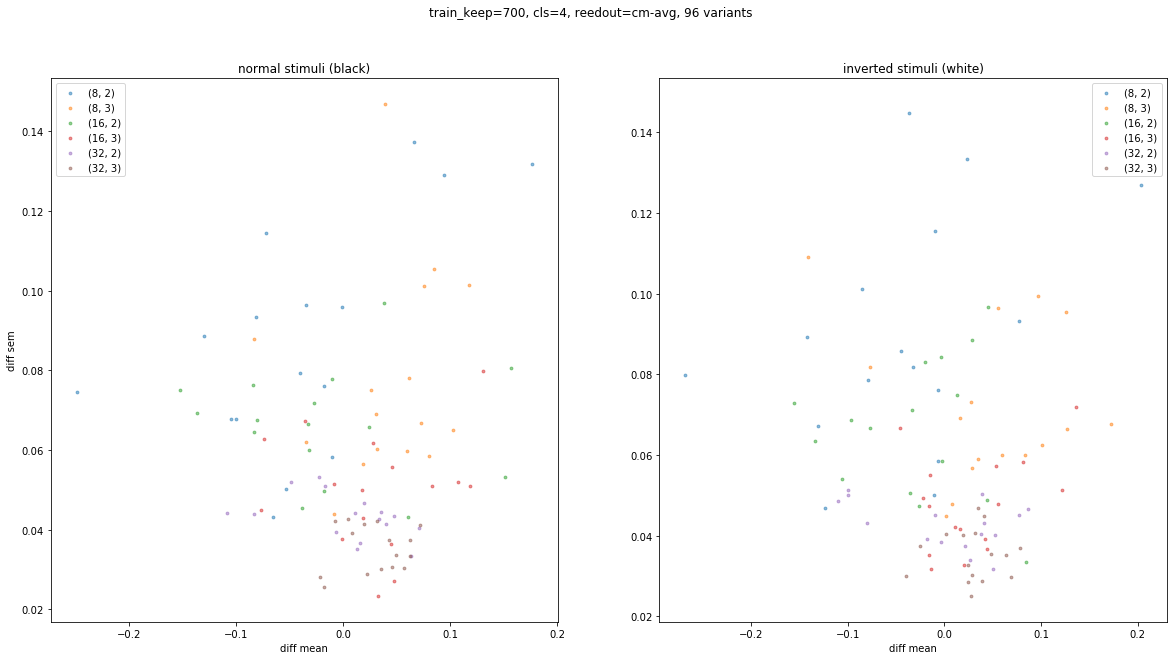

mean of mean over this readout 0.008182962695023152 mean of sem over this readout 0.059962863125849995
mean of mean over this readout, inverted 0.005087329570517293 mean of sem over this readout 0.058882791386858445


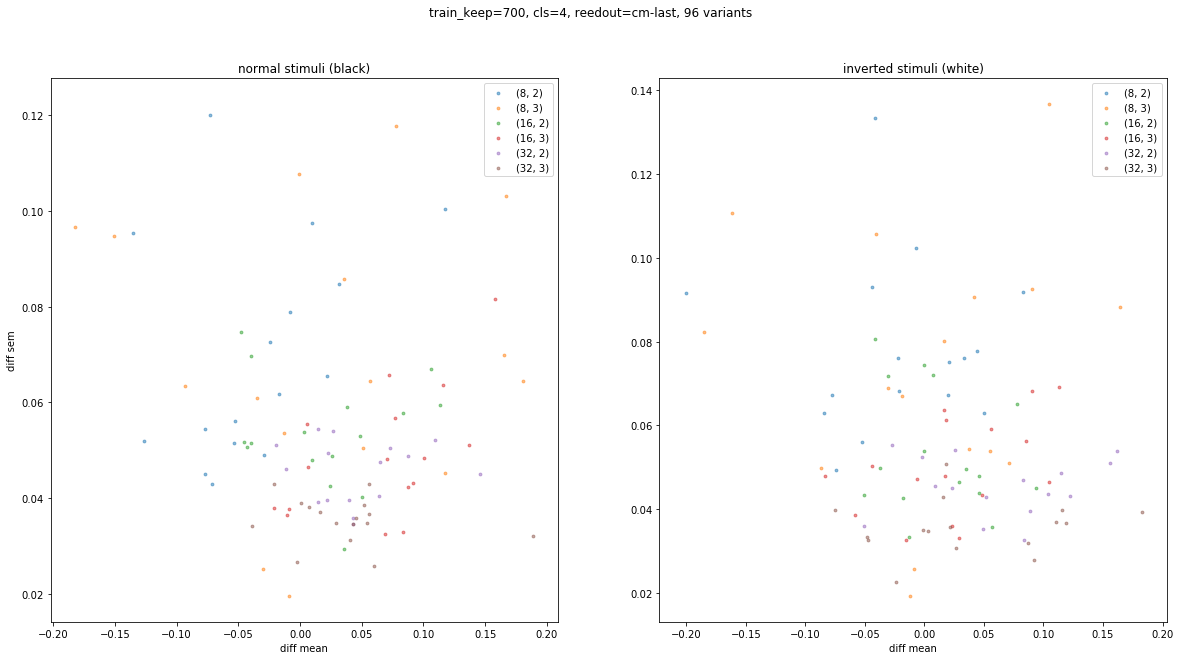

mean of mean over this readout 0.02556408376970863 mean of sem over this readout 0.053960871100822184
mean of mean over this readout, inverted 0.019171468285851066 mean of sem over this readout 0.056059866282835526


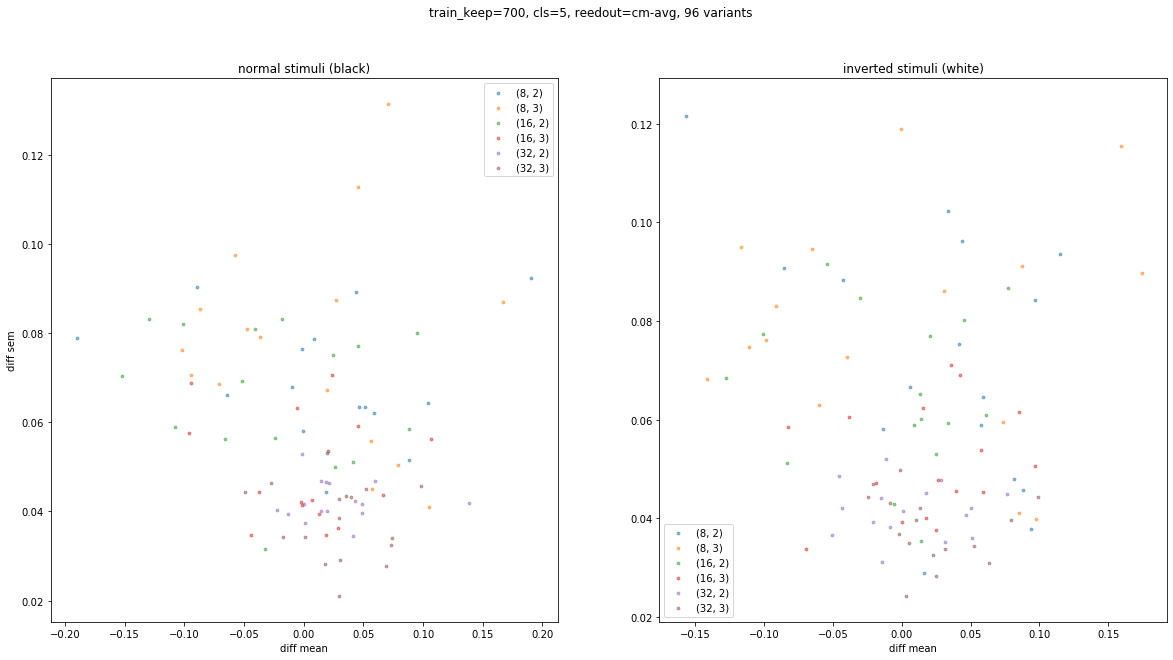

mean of mean over this readout 0.010048375783922132 mean of sem over this readout 0.05686110602233314
mean of mean over this readout, inverted 0.01111310387135133 mean of sem over this readout 0.05811691601460594


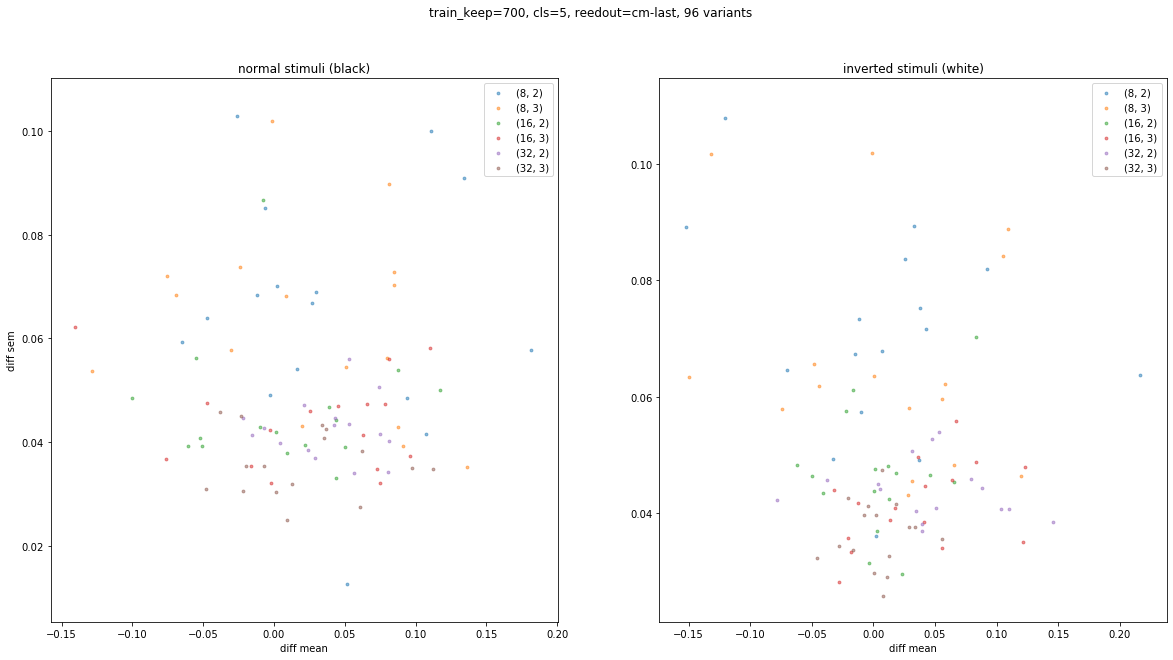

mean of mean over this readout 0.024884136253873108 mean of sem over this readout 0.04933985412081232
mean of mean over this readout, inverted 0.016955902256127125 mean of sem over this readout 0.05071264284322064


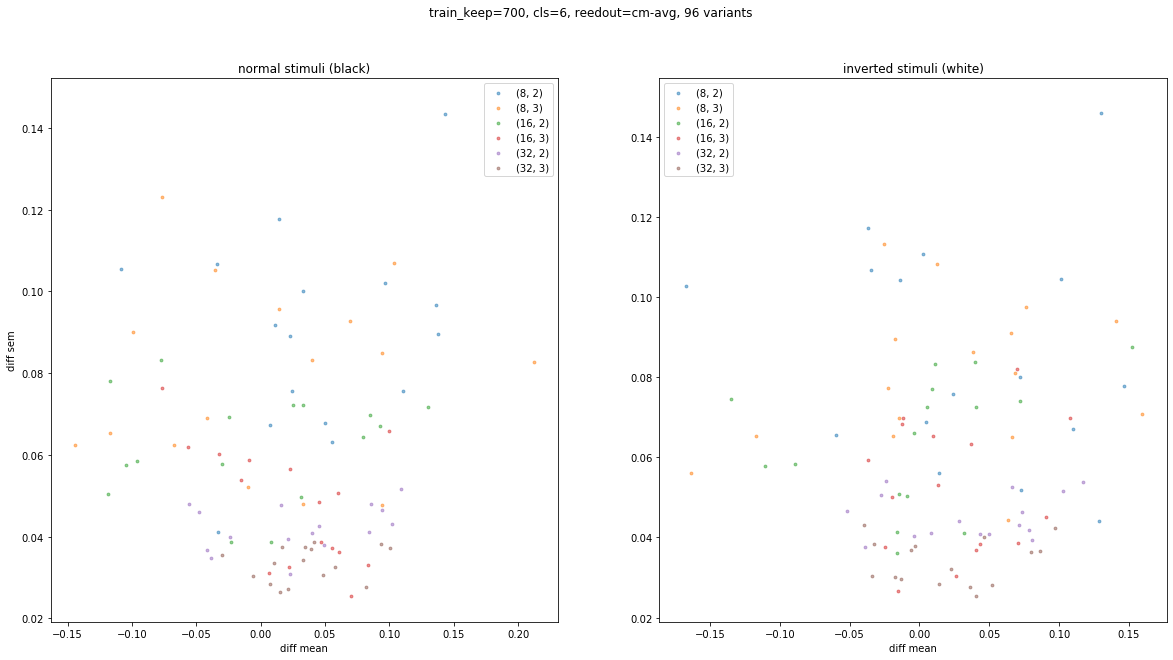

mean of mean over this readout 0.021250728559129028 mean of sem over this readout 0.05916199890425775
mean of mean over this readout, inverted 0.021460383950904535 mean of sem over this readout 0.0602438788317163


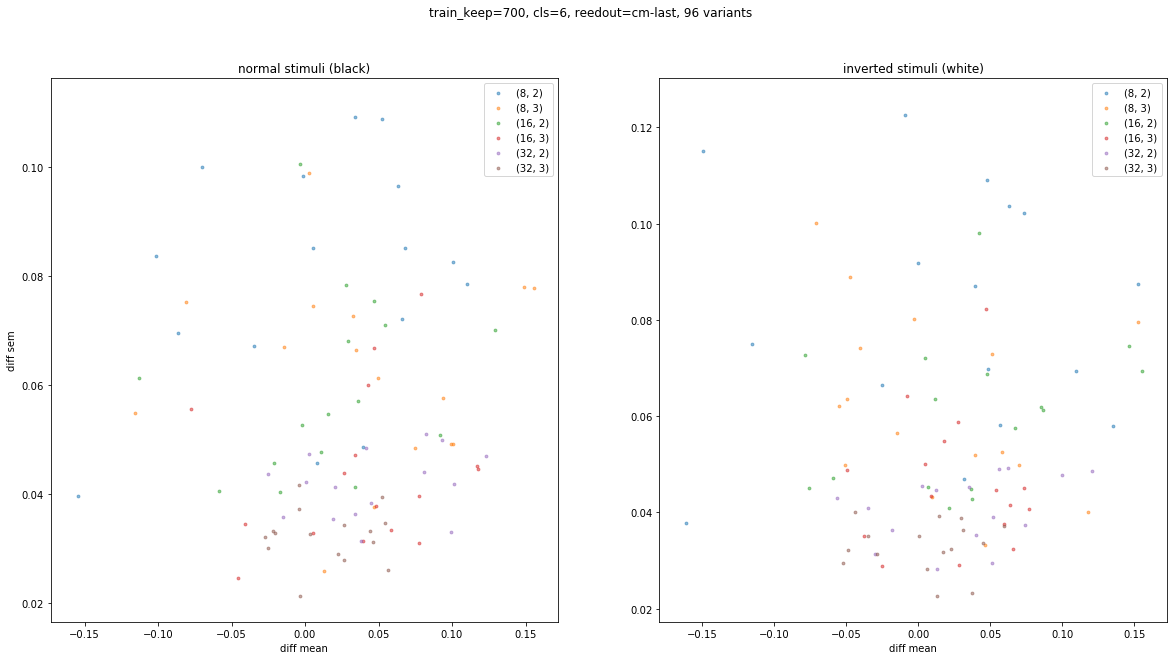

mean of mean over this readout 0.02689659170828908 mean of sem over this readout 0.05324579767296391
mean of mean over this readout, inverted 0.02087907478938476 mean of sem over this readout 0.05395979210668786


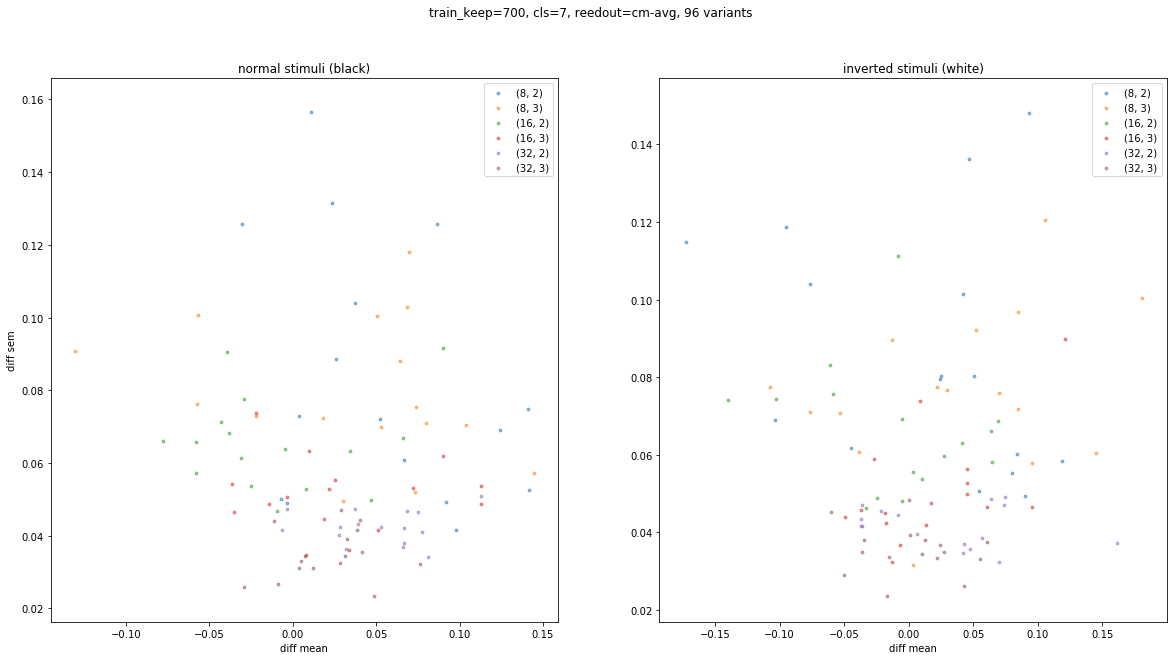

mean of mean over this readout 0.02983694257951458 mean of sem over this readout 0.05929349522830557
mean of mean over this readout, inverted 0.014840596066347722 mean of sem over this readout 0.059344059666424955


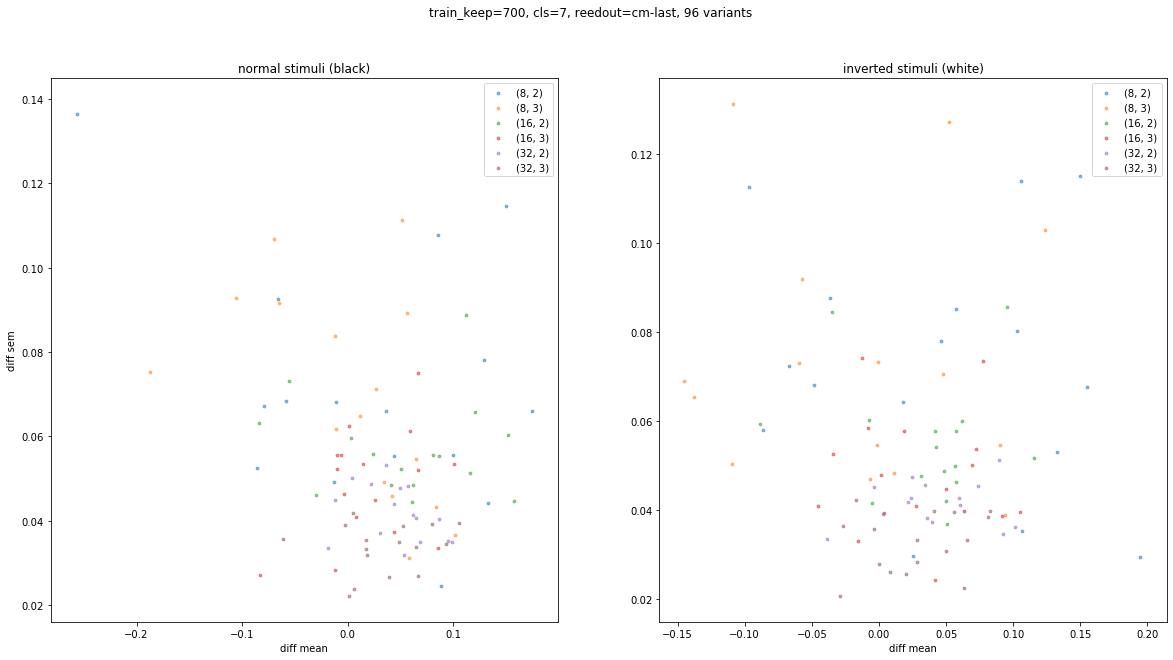

mean of mean over this readout 0.03104333254837972 mean of sem over this readout 0.05370676435695882
mean of mean over this readout, inverted 0.028719970455469822 mean of sem over this readout 0.05329126542821248


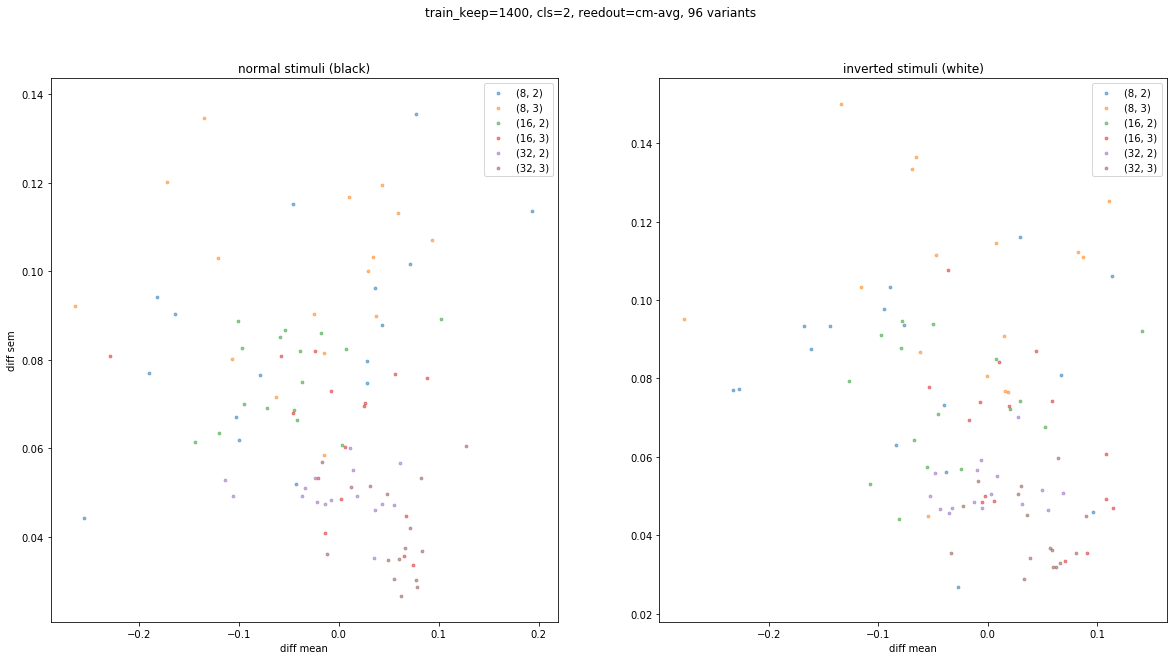

mean of mean over this readout -0.013591725982968497 mean of sem over this readout 0.06891775989515676
mean of mean over this readout, inverted -0.010226515410317674 mean of sem over this readout 0.06910945012190668


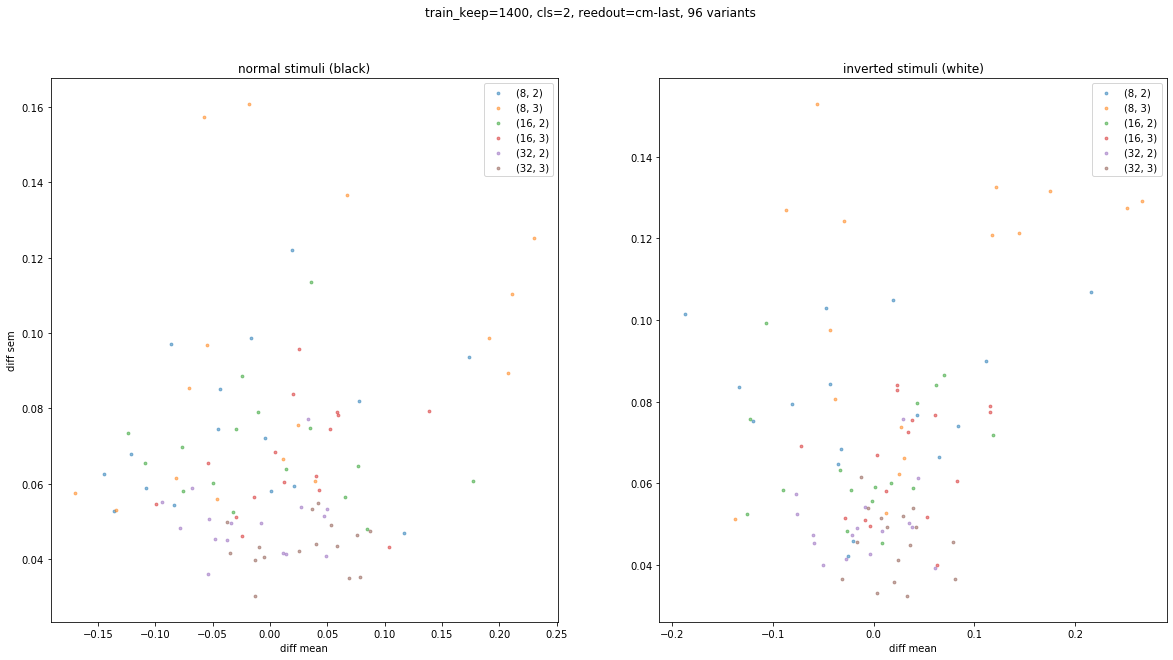

mean of mean over this readout 0.004819136811230515 mean of sem over this readout 0.0659798559487809
mean of mean over this readout, inverted 0.011248075940875896 mean of sem over this readout 0.06820260835207616


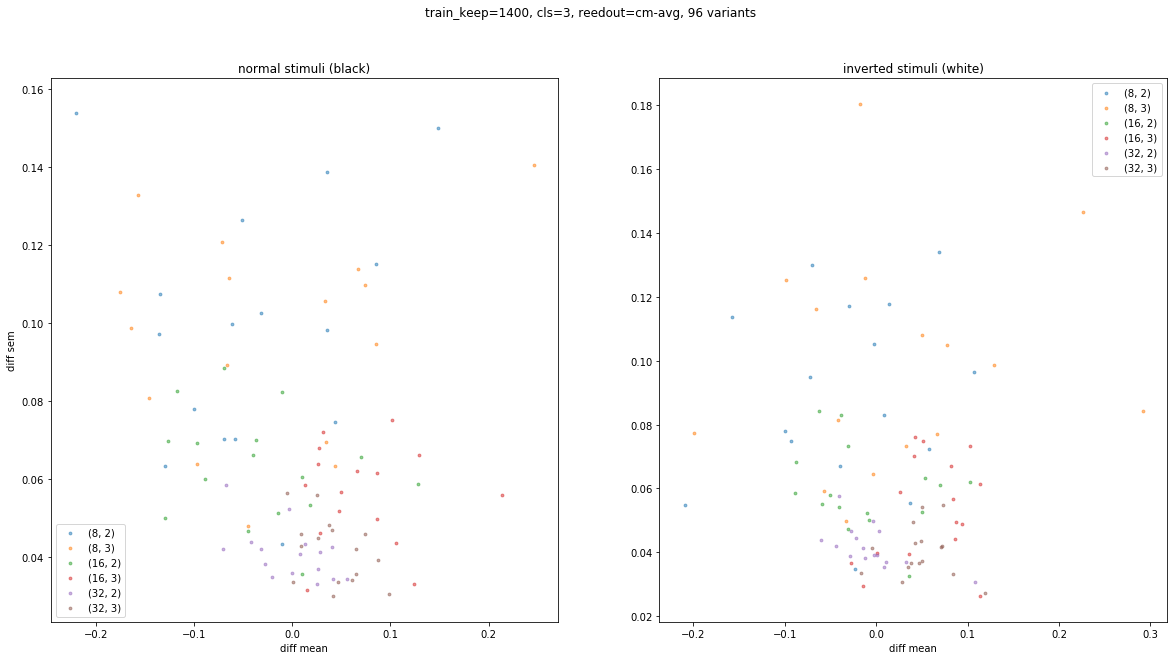

mean of mean over this readout 0.002177342021420795 mean of sem over this readout 0.06628955544316098
mean of mean over this readout, inverted 0.01290989025844271 mean of sem over this readout 0.06374725391813661


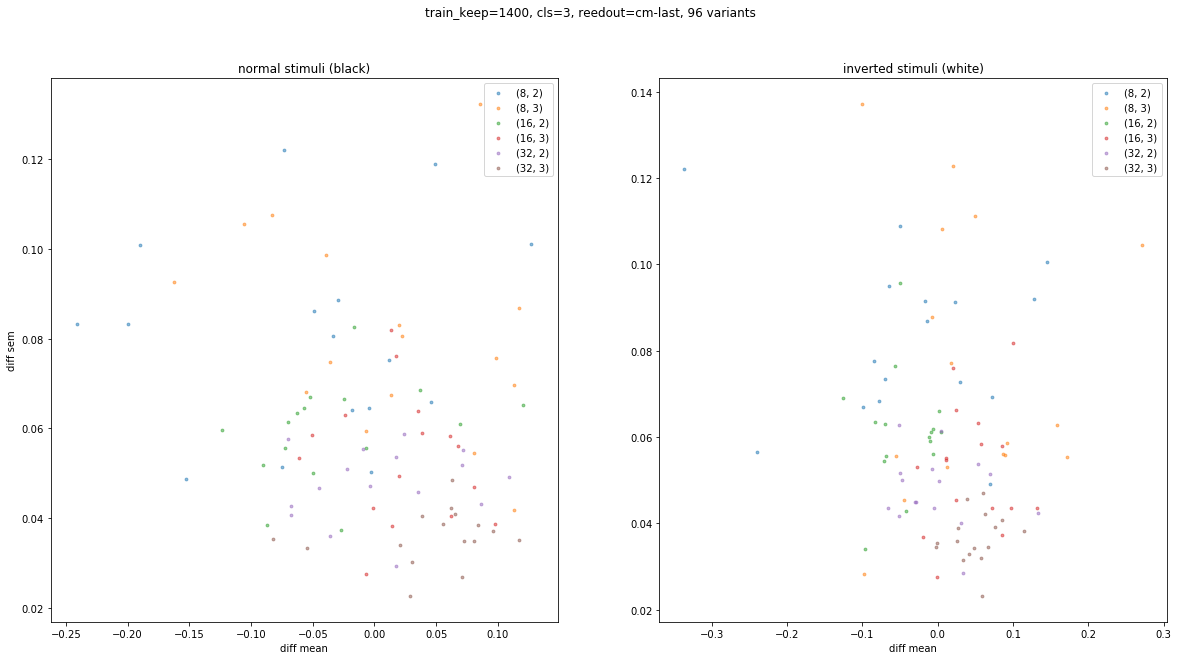

mean of mean over this readout 0.0005128546364886374 mean of sem over this readout 0.059636191039510233
mean of mean over this readout, inverted 0.009404338176963949 mean of sem over this readout 0.059538977715175884


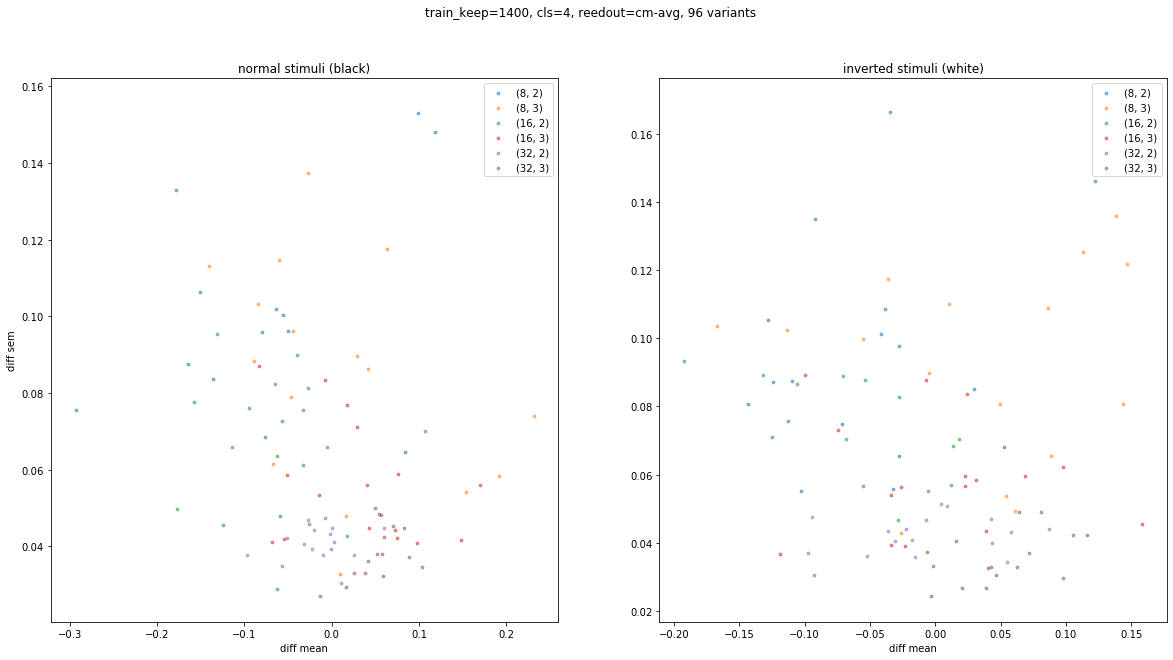

mean of mean over this readout -0.008434854197405285 mean of sem over this readout 0.06327735451072879
mean of mean over this readout, inverted -0.005679290126083339 mean of sem over this readout 0.0659480052293865


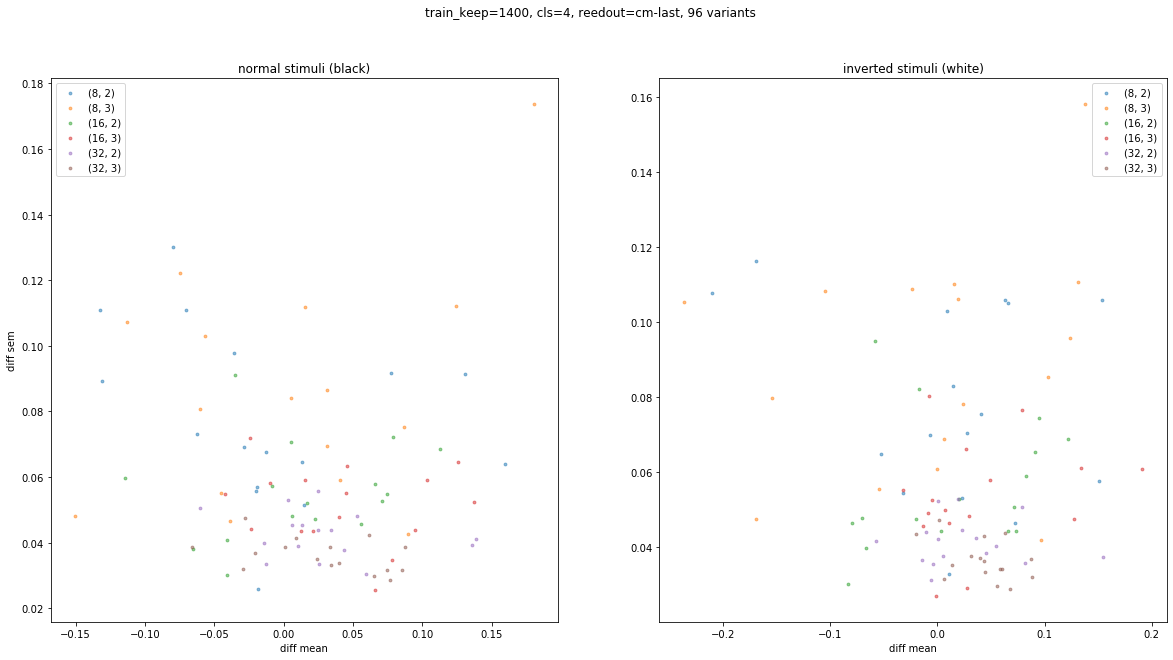

mean of mean over this readout 0.017397670866876214 mean of sem over this readout 0.05829570246831969
mean of mean over this readout, inverted 0.021052155720368577 mean of sem over this readout 0.059020822460371526


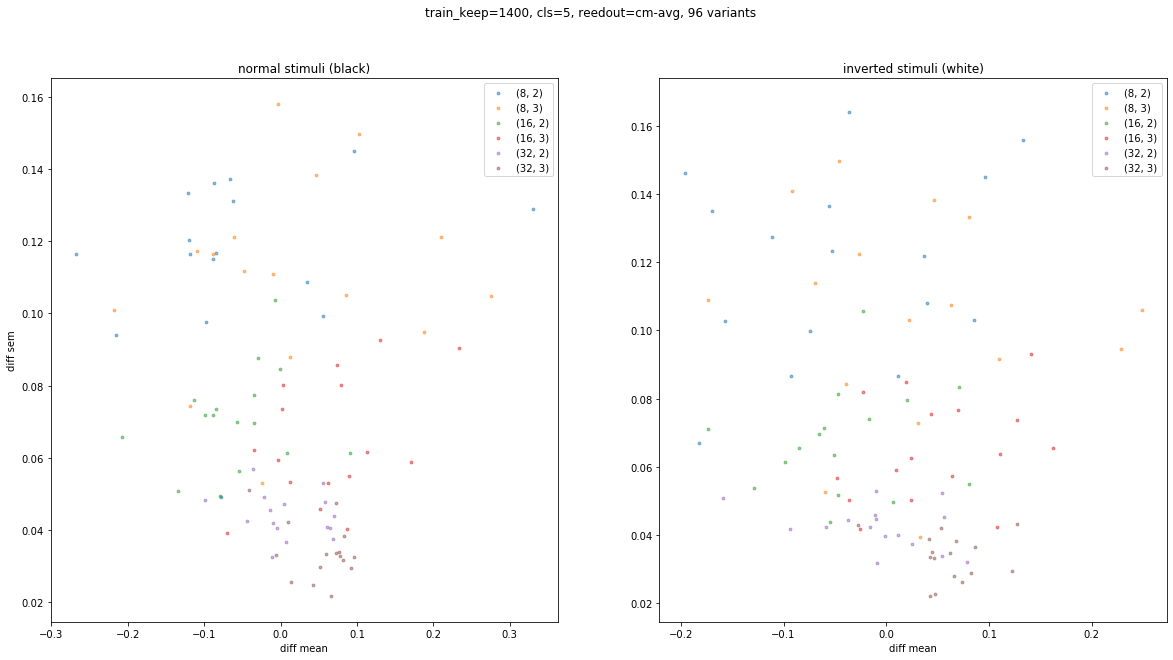

mean of mean over this readout 0.004352838776666694 mean of sem over this readout 0.07311192179100685
mean of mean over this readout, inverted 0.006100923759963237 mean of sem over this readout 0.0718136718116609


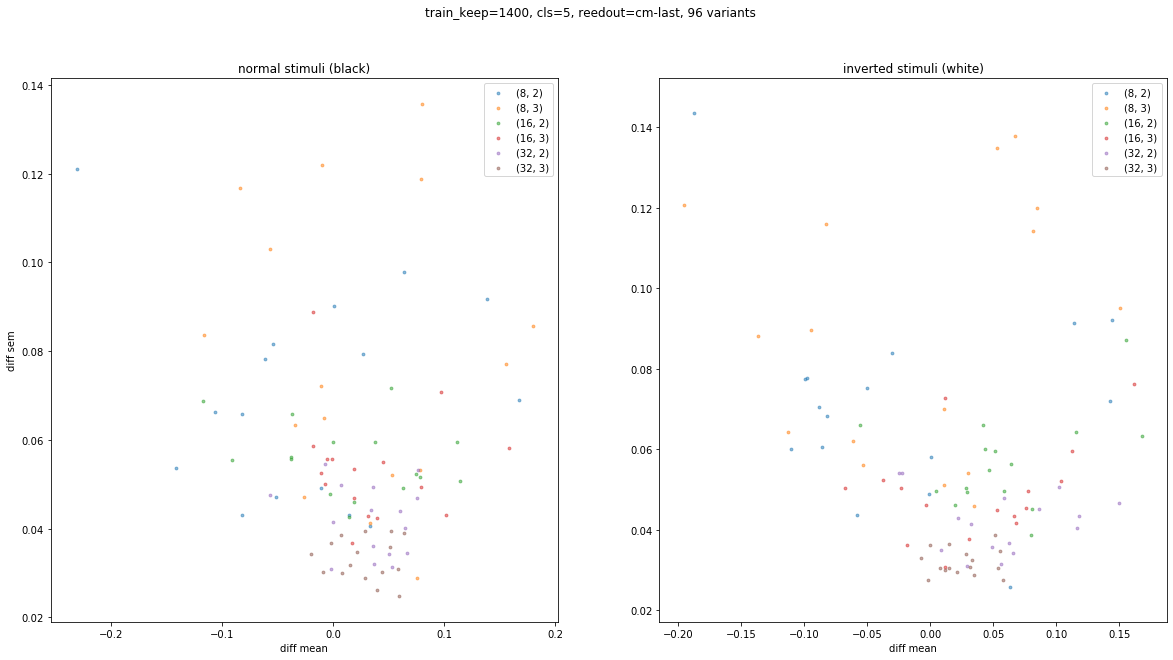

mean of mean over this readout 0.018588367451008597 mean of sem over this readout 0.05558565559413675
mean of mean over this readout, inverted 0.023075210084247438 mean of sem over this readout 0.056709429311994554


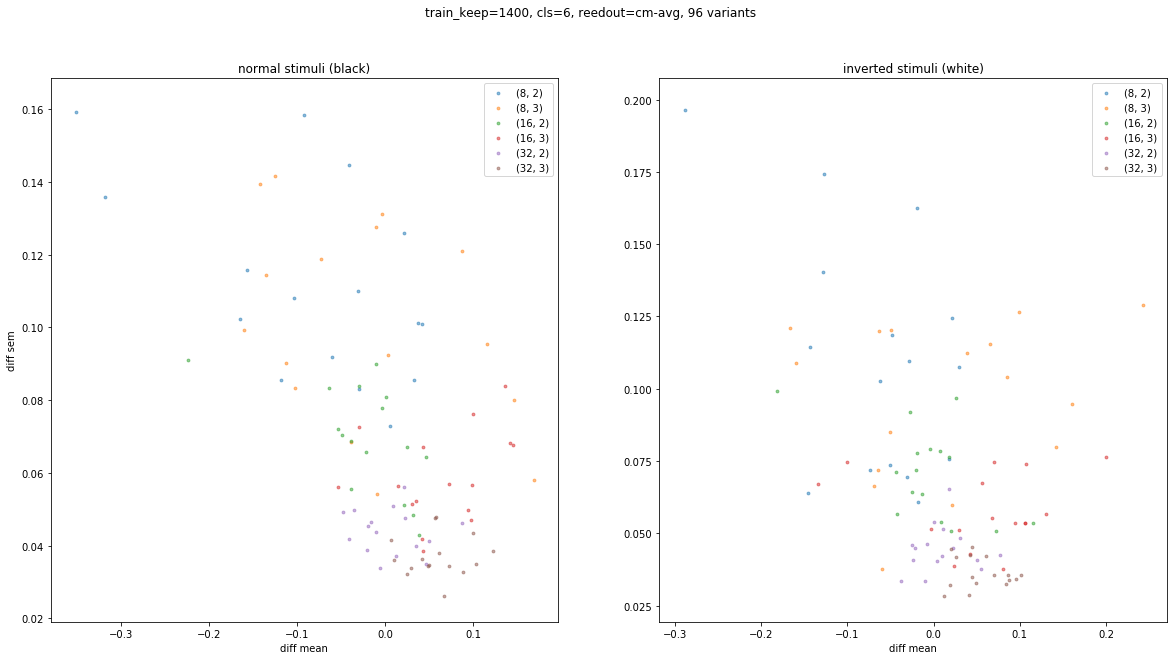

mean of mean over this readout -0.0008598318450360375 mean of sem over this readout 0.0702901917708609
mean of mean over this readout, inverted 0.009141555350799347 mean of sem over this readout 0.06957581424866349


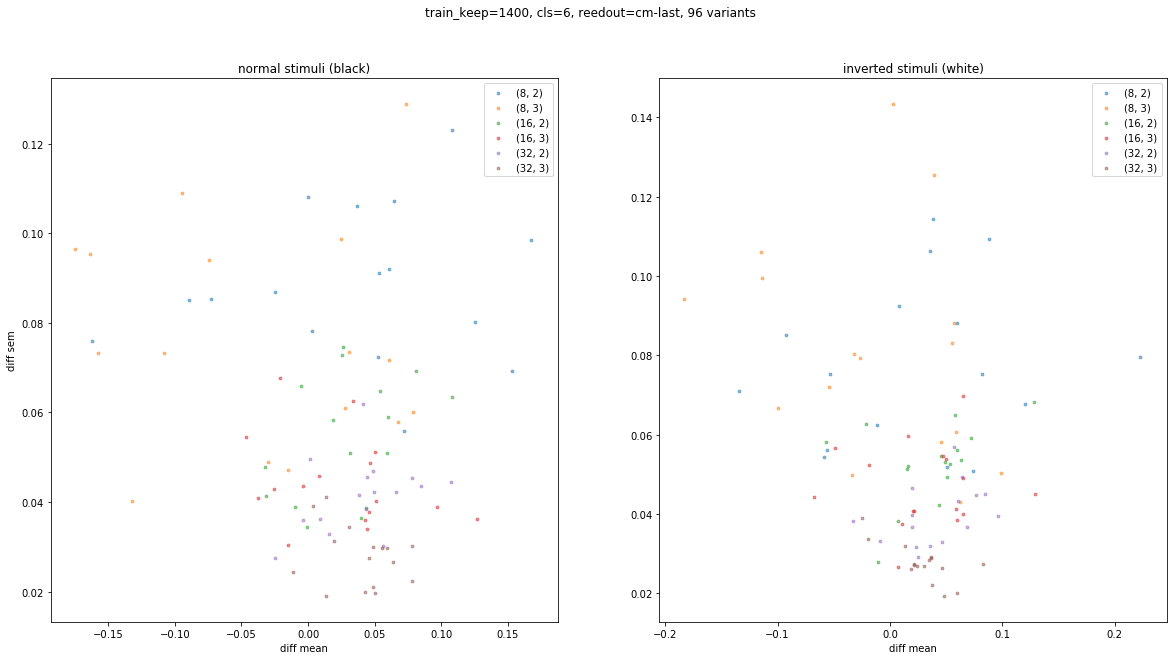

mean of mean over this readout 0.02212577640664833 mean of sem over this readout 0.055539609889554316
mean of mean over this readout, inverted 0.024032463222120604 mean of sem over this readout 0.0542806370422624


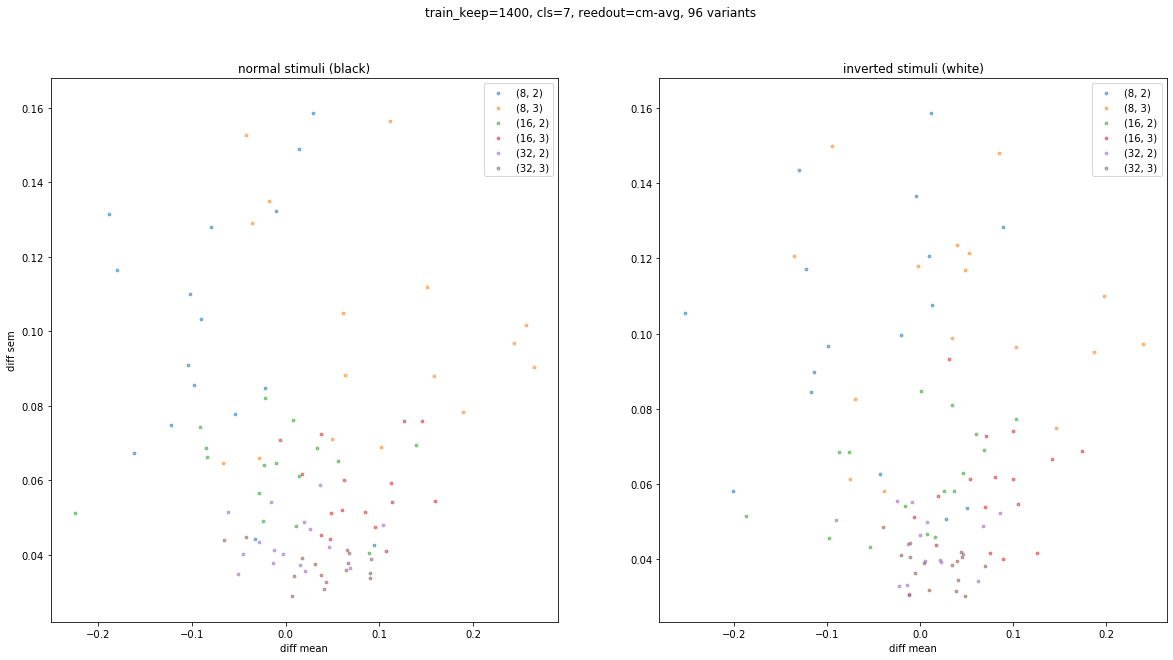

mean of mean over this readout 0.021587569427656893 mean of sem over this readout 0.06673433563775137
mean of mean over this readout, inverted 0.014066959819021882 mean of sem over this readout 0.06788840369461906


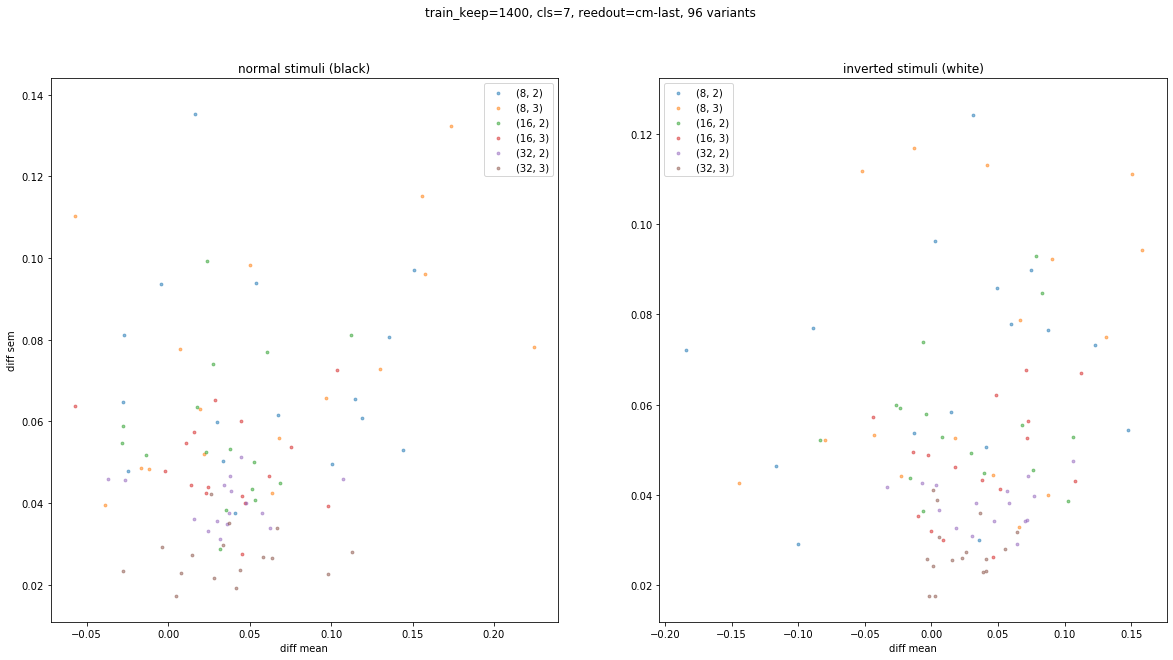

mean of mean over this readout 0.0440087713872769 mean of sem over this readout 0.053285471727178596
mean of mean over this readout, inverted 0.028032746552302618 mean of sem over this readout 0.05167391967902216


In [9]:
def show_scatter_plots():
    for train_keep in df_main_result.index.get_level_values('train_keep').unique():
        df_main_result_this_train = df_main_result.xs(train_keep, level='train_keep')
        for cls in df_main_result_this_train.index.get_level_values('rcnn_bl_cls').unique():
            if cls == 1:
                continue

            df_this_main = df_main_result_this_train.xs(cls, level='rcnn_bl_cls')

            for readout_type in df_this_main.index.get_level_values('readout_type').unique():
                df_this_readout = df_this_main.xs(readout_type, level='readout_type')

                index_out_channel = df_this_readout.index.get_level_values('out_channel').values
                index_num_layer = df_this_readout.index.get_level_values('num_layer').values

                data_channel_layer = np.asarray([index_out_channel, index_num_layer]).T
                #     print(data_channel_layer.dtype, data_channel_layer.shape)
                unique_channel_layer = np.unique(data_channel_layer, axis=0).tolist()

                plt.close('all')
                fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
                axes = axes.ravel()

                for key_this in unique_channel_layer:
                    key_this = tuple(key_this)
                    (c_this, l_this) = key_this
                    df_this = df_this_readout.xs(key=(c_this, l_this), level=('out_channel', 'num_layer'))
                    assert len(df_this)*6 == len(df_this_readout)
                    axes[0].scatter(
                        df_this['hal_tuning_mean'].values,
                        df_this['hal_tuning_sem'].values,
                        label=key_this,
                        alpha=0.5,
                        s=8
                    )

                    axes[1].scatter(
                        df_this['hal_tuning_mean_inv'].values,
                        df_this['hal_tuning_sem_inv'].values,
                        label=key_this,
                        alpha=0.5,
                        s=8
                    )

                axes[0].legend(loc='best')
                axes[1].legend(loc='best')
                fig.suptitle(f'train_keep={train_keep}, cls={cls}, reedout={readout_type}, {len(df_this_readout)} variants')
                axes[0].set_title('normal stimuli (black)')
                axes[1].set_title('inverted stimuli (white)')

                axes[0].set_xlabel('diff mean')
                axes[1].set_xlabel('diff mean')
                axes[0].set_ylabel('diff sem')
                plt.show()

                print('mean of mean over this readout', df_this_readout['hal_tuning_mean'].mean(), 'mean of sem over this readout', df_this_readout['hal_tuning_sem'].mean())
                print('mean of mean over this readout, inverted', df_this_readout['hal_tuning_mean_inv'].mean(), 'mean of sem over this readout', df_this_readout['hal_tuning_sem_inv'].mean())
show_scatter_plots()